
# **Perspective Transforms**

####**In this lesson we'll learn:**
1. Use OpenCV's getPerspectiveTransform
2. Use findContours to get corners and automate perspective Transform


In [4]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q

!unzip -qq images.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=34ffad52-b3f7-4274-9bff-928eed2ab27e
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 152MB/s] 
replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

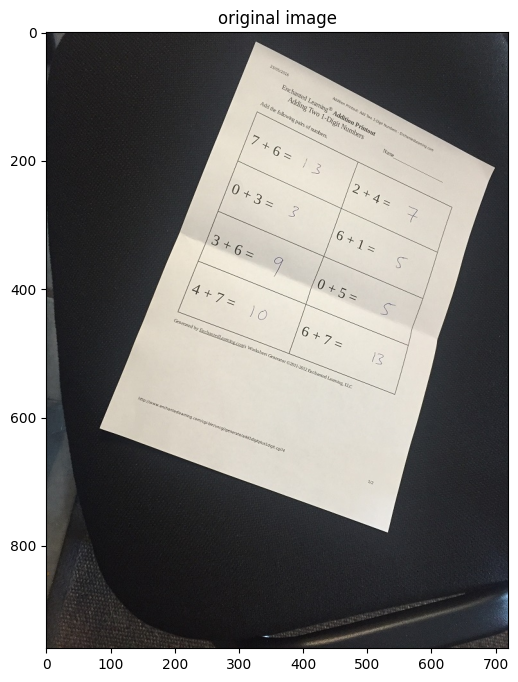

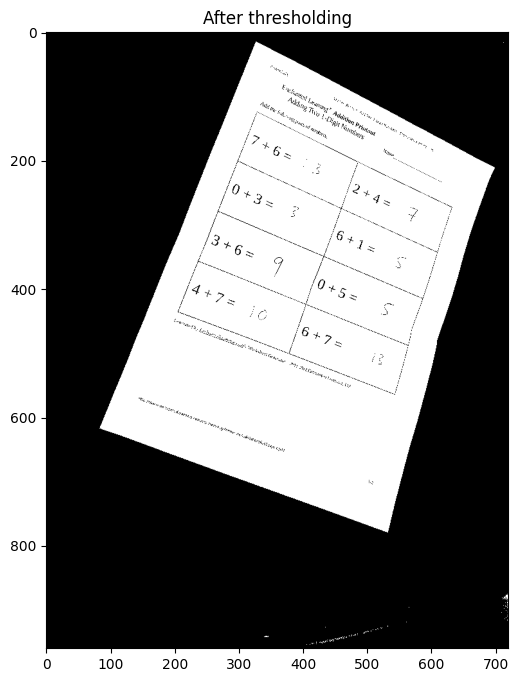

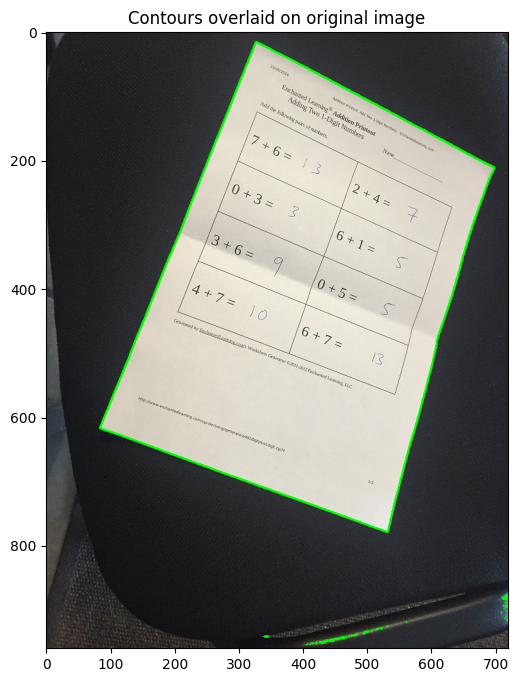

Number of Contours found = 54


In [5]:
image = cv2.imread('images/scan.jpg')
imshow('original image', image)
# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# 이미지 복사본(예: edged copy()을 사용합니다. find contours(원선 찾기)는 이미지를 변경합니다
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 모든 윤곽선을 그립니다. 입력 이미지를 덮어씁니다(제자리 작동)
# 세 번째 매개변수로 '-1'을 사용하여 모두 그리기
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

### **Approxiamte our contour above to just 4 points using approxPolyDP**

In [6]:
# 영역별로 큰 등고선에서 작은 등고선 정렬

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# 윤곽을 넘기다
for cnt in sorted_contours:
	# 윤곽선의 근사치
	perimeter = cv2.arcLength(cnt, True)
	approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)

	if len(approx) == 4:
		break

# 네 귀퉁이의 x,y 코디네이드
print("Our 4 corner points are:")
print(approx)



Our 4 corner points are:
[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


### **Use getPerspectiveTransform and warpPerspective to create our top down view**

Note: We mannauly matched the order of the points

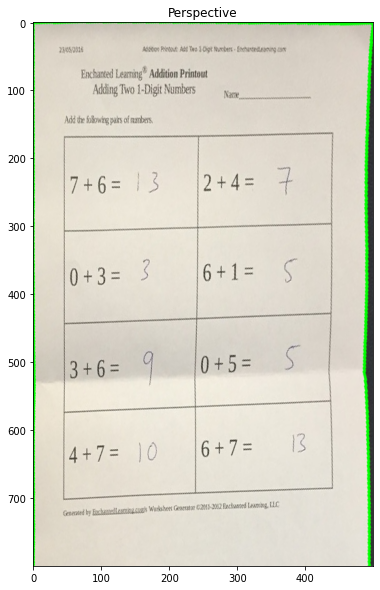

In [ ]:
# 여기서 얻은 순서는 왼쪽 위, 왼쪽 아래, 오른쪽 아래, 오른쪽 위입니다
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,800],
                       [500,800],
                       [500,0]])

# 변환 매트릭스 가져오기, M
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Warp Perspective를 사용하여 변환 Matrix 적용
dst = cv2.warpPerspective(image, M, (500,800))

imshow("Perspective", dst)

### **Excercise**

1. Order points in ```approx``` sorting from top left going clockwise (i.e. top left, top right, bottom left, bottom right)
2. Get initial contour aspect ratio and adjust final Warp to output in that aspect ratio and orientation

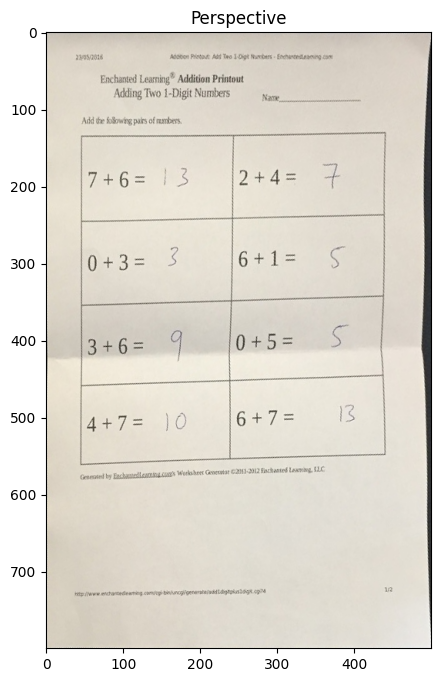

In [9]:
import cv2
import numpy as np

# 이미지 읽기
image = cv2.imread('images/scan.jpg')

# 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이진화 처리
_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 윤곽선 찾기
contours, _ = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 넓이를 기준으로 윤곽선 정렬
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# 꼭지점이 4개인 가장 큰 윤곽선 찾기
for cnt in sorted_contours:
    perimeter = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)

    if len(approx) == 4:
        break

# 원근 변환을 위한 출력 점 정의
output_pts = np.float32([[0, 0], [0, 800], [500, 800], [500, 0]])

# 변환 행렬 구하기
M = cv2.getPerspectiveTransform(approx.astype(np.float32), output_pts)

# 원근 변환 적용
dst = cv2.warpPerspective(image, M, (500, 800))

# 결과 표시
imshow("Perspective", dst)
